In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arch import arch_model
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats import norm

# Simulación con distribucion normal

In [8]:
mu =0
omega = 0.1
alpha = 0.4
beta = 0.3
sim_mod = arch_model(None, p=1, o=0, q=1,dist="normal")
params = {"mu":mu,"omega": omega,"alpha[1]":alpha,"beta[1]":beta}
param = pd.Series(params)

n=1000


In [9]:
np.random.seed(69)
datos_simulados = []
for i in range(n):
    sim_data = sim_mod.simulate(param, 1000)
    datos_simulados.append(sim_data["data"])

# Ajuste y Resultados

In [10]:
columns = ["mu","omega","alpha1","beta1"]
parametros = pd.DataFrame(columns=columns)
parametros
for i in range(n):
    modelo = arch_model(datos_simulados[i], p=1, o=0, q=1)
    res = modelo.fit(disp="off")
    new_row = pd.DataFrame([res.params.values], columns=columns)
    parametros = pd.concat([parametros,new_row], axis=0)

parametros.hist(figsize=(10, 8), grid = False,bins=32);

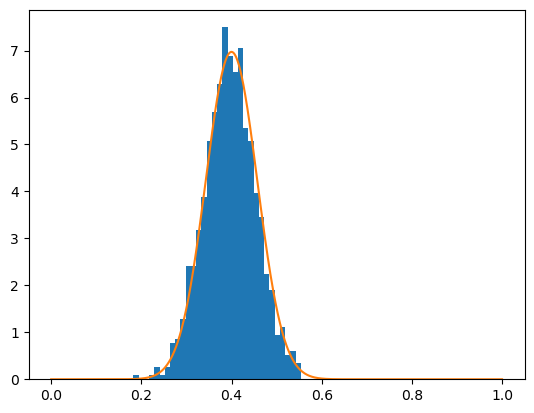

In [11]:
plt.hist(parametros["alpha1"],bins=32,density=True);
f_normal = lambda x : np.exp(-(x-alpha)**2/(2*np.var(parametros["alpha1"],)))/np.sqrt(2*np.pi*np.var(parametros["alpha1"]))
x = np.linspace(0, 1, 1000)
plt.plot(x,f_normal(x));